# 朴素贝叶斯

<font color="blue">作者：欧新宇（Xinyu OU）</font>

<font color="red">本文档所展示的测试结果，均运行于：Intel Core i7-7700K CPU 4.2GHz</font>

<font color="blue">贝叶斯方法</font>是以**贝叶斯原理**为基础，使用概率统计的知识对样本数据集进行分类。由于其有着坚实的数学基础，在相当的一段时期，贝叶斯分类算法的都具有较低的误判率。贝叶斯方法的特点是结合***先验概率***和***后验概率***，即避免了只使用先验概率的主观偏见，也避免了单独使用样本信息的过拟合现象。贝叶斯分类算法在数据集较大的情况下表现出较高的准确率，同时算法本身也比较简单。

<font color="blue">朴素贝叶斯（Naive Bayesian) 算法</font>是一种基于贝叶斯理论的有"**监督学习算法**",它假定给定目标值的属性之间是相互条件独立的，因此称之为"朴素"。（*也就是说没有哪个属性变量对于决策结果来说占有着较大的比重，也没有哪个属性变量对于决策结果占有着较小的比重。虽然这个简化方式在一定程度上降低了贝叶斯分类算法的分类效果，但是在实际的应用场景中，极大地简化了贝叶斯方法的复杂性。*）

## 1. 朴素贝叶斯的基本概念

### 1.1 从一个例子引申出的极简贝叶斯定理

<font style="color:red; font-weight:bold;">【知识点】[朴素贝叶斯算法分析](knowledgement/NaiveBayes.ipynb)</font>

---

**已知：**
- P(A): 表示天气预报今日降水的概率
- P(B): 表示晚高峰堵车的概率
- P(B|A): 如果下雨，晚高峰堵车的概率

**那么：**
当堵车时，下雨的概率为：
$ P(A|B) = \frac{P(B|A)·P(A)}{P(B)} $

设，P(A) = 50%, P(B) = 80%, P(B|A) = 95%，

则堵车时，下雨的概率$ P(A|B) = \frac{P(B|A)·P(A)}{P(B)} = \frac{0.95*0.5}{0.8} = 0.59375$

---

### 1.2 朴素贝叶斯的简单应用

- 假设，有三种与天气有关的气象现象，刮北风、闷热和多云。我们可以用布尔数据表示这些气象现象的状态。例如：刮北风 = 1，不闷热 = 0， 多云 = 1， 不多云 = 0。我们可以将这些与天气预报有关的气象现象称之为特征。换句话说，在这个例子中，每个样本都有三个特征，可以分别表示为: $f_1, f_2, f_3$

- 在这些气象现象下，给出对天气的预测 $\hat{y}$，取值同样为布尔类型 $\hat{y} = {0, 1}$。

- 假设实际的天气，$ y = [0, 1, 1, 0, 1, 0, 0] $，其中有3天下雨，4天天晴（没有雨）

我们可以将这些信息汇总如下表：
 
<div style="float:left;">
    
||刮北风|闷热|多云|天气预报下雨|实际天气
:-:|:-:|:-:|:-:|:-:|:-:
第一天|0|1|0|1|<b>0</b>
第二天|1|1|1|0|<b>1</b>
第三天|0|1|1|0|<b>1</b>
第四天|0|0|0|1|<b>0</b>
第五天|0|1|1|0|<b>1</b>
第六天|0|1|0|1|<b>0</b>
第七天|1|0|0|1|<b>0</b>
    
</div>

对于以上表格中信息，我们可以使用两个矩阵来表示: 

$ \begin{matrix}
X = \begin{bmatrix} 0&1&0&1 \\ 1&1&1&0 \\ 0&1&1&0 \\ 0&0&0&1 \\ 0&1&1&0 \\ 0&1&0&1 \\ 1&0&0&1 \end{bmatrix} 
&
y = \begin{bmatrix} 0 \\ 1 \\ 1 \\ 0 \\ 1 \\ 0 \\ 0 \end{bmatrix} 
\end{matrix} $

#### 1.2.1 统计气候现象、预测的天气与实际天气之间的关系

In [3]:
import numpy as np

#将X，y赋值为 np数组；X表示气候现象和预测的天气；y 表示实际的天气情况
X = np.array([[0, 1, 0, 1], 
              [1, 1, 1, 0], 
              [0, 1, 1, 0], 
              [0, 0, 0, 1], 
              [0, 1, 1, 0], 
              [0, 1, 0, 1], 
              [1, 0, 0, 1]])

y = np.array([0, 1, 1, 0, 1, 0, 0])

#对不同分类计算每个特征为 1的数量，并使用字典类型进行保存 {气候现象: 出现的次数}
counts = {}
for label in np.unique(y):
    counts[label] = X[y == label].sum(axis = 0) # 将多维数组中的数值，按列进行相加

print("下雨的天数:{0}天，天晴(不下雨)的天数:{1}天\n".format(sum(y == 1), sum(y == 0)))
print("下雨与气候的关系:\n {}".format(counts))

下雨的天数:3天，天晴(不下雨)的天数:4天

下雨与气候的关系:
 {0: array([1, 2, 0, 4]), 1: array([1, 3, 3, 0])}


<br/>

<font style="color:red; font-weight:bold;">【知识点】[numpy.unique()](functions/numpy.unique.ipynb)</font>


从输出结果来看，我们可以知道：
- 当 y = 0 时(不下雨的4天), 有1天刮北风、2天闷热、0天多云，但是这4天都被预报为有雨
- 当 y = 1 时(下雨的3天), 有1天刮北风、3天闷热、3天多云，但这3天都被预测为没有雨

<font style="color:red; font-size:1.5em;">这是一个多么奇葩的结果啊！那么，下面我们看看基于这样的奇葩结果，**贝叶斯**是否能给我们一些惊喜！</font>

#### 1.2.2 给定天气特征预测晴雨

- **场景一：**

假设天气预报为晴朗，但出现了多云的情况。试问真实的天气是什么？<br/>
我们将该问题符号化后可以得到：

条件：$ f_1 = 0, f_2 = 0, f_3 = 1, \hat{y} = 0 $ <br/>
求解：$ y $


In [1]:
# 导入贝努利贝叶斯库
from sklearn.naive_bayes import BernoulliNB

# 定义一个贝努利贝叶斯分类器，用于实现数据拟合
clf = BernoulliNB()
clf.fit(X, y)

# 按照题设条件设定新数据
New_Day = [[0, 0, 1, 0]]
pred = clf.predict(New_Day)

# 输出预测结果
if pred == [1]:
    print("要下雨了, 快收衣服啦！(y = 1)")
else:
    print("太阳出来了！(y = 0)")

NameError: name 'X' is not defined

- **场景二：**

假设天气预报为有雨，但出现了刮北风，闷热，云量不多的情况。试问真实的天气是什么？

条件：$ f_1 = 1, f_2 = 1, f_3 = 0, \hat{y} = 1 $ <br/>
求解：$ y $


In [2]:
# 导入贝努利贝叶斯库
from sklearn.naive_bayes import BernoulliNB

# 定义一个贝努利贝叶斯分类器，用于实现数据拟合
clf = BernoulliNB()
clf.fit(X, y)

# 按照题设条件设定新数据
New_Day2 = [[1, 1, 0, 1]]
pred2 = clf.predict(New_Day2)

# 输出预测结果
if pred2 == [1]:
    print("要下雨了, 快收衣服啦！(y = 1)")
else:
    print("太阳出来了！(y = 0)")

NameError: name 'X' is not defined

#### 1.2.3 输出预测准确率

In [6]:
prob1 = clf.predict_proba(New_Day)
prob2 = clf.predict_proba(New_Day2)

print("第一天的预测概率为: {}".format(prob1))
print("第二天的预测概率为: {}".format(prob2))

第一天的预测概率为: [[0.13848881 0.86151119]]
第二天的预测概率为: [[0.92340878 0.07659122]]


**结论：[预测概率] 和 [预测结果] 基本一致，然而贝叶斯算法对于数值预测并擅长，因此predict_proba()的预测结果仅供参考。**

## 2. 朴素贝叶斯算法的不同方法

在scikit-learn中有三种类型的朴素贝叶斯，也是机器学习中最常见的朴素贝叶斯：贝努利朴素贝叶斯 (Bernoulli Naive Bayes)、高斯朴素贝叶斯 (Gaussian Naive Bayes)、多项式朴素贝叶斯 (Multinomial Naive Bayes)。

### 2.0 载入数据及数据初始化

In [7]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# 生成样本数为 50000， 分类数为 2的数据集，并按照 75%:25% 的比例进行拆分
X, y = make_blobs(n_samples = 500, centers = 5, random_state = 8)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 8)

此处，我们可以轻松地修改make_blobs()函数来实现二分类和多分类的调整。
- 二分类: 超参数 `centers = 2` 
- 多分类: 超参数 `centers = 5`， 例如，将样本分为5个类别，可以设置 center = 5

### 2.1 贝努利朴素贝叶斯 (BernoulliNB)

贝努利分布也称为"二项分布"，或者"0-1分布"。对于随机变量 X，如果 X 的取值只能为 0 或 1，即 X = {0, 1} 则称随机变量X满足贝努利分布，其相应的概率为：

$ f(x)=\left\{
\begin{aligned}
P(x = 1) & = & p \\
p(x = 0) & = & 1 - p
\end{aligned}
\right. $

$ s.t. 0 < p < 1 $

贝努利朴素贝叶斯是一种比较适合于符合贝努利分布的贝叶斯算法，具体而言就是那些只有两种可能的实验，例如：证明或反面，成功或失败，有缺陷或没有缺陷，病人康复或未康复等。

值得注意的是，虽然贝努利朴素贝叶斯擅长于二分类问题，但是并不代表它不能做多分类，只是性能不那么理想而已。

#### **2.1.1 模型评分**

In [8]:
# 导入贝努利贝叶斯库
from sklearn.naive_bayes import BernoulliNB

# 使用贝努利贝叶斯拟合数据
# 默认情况下，二值化参数binarize = 0, 通过调整二值化参数可以优化模型
nb = BernoulliNB() 
#nb = BernoulliNB(binarize = 4)
nb.fit(X_train, y_train)

# 输出模型评分，即正确率
score = nb.score(X_test, y_test)
print("模型评分：{:.3f}".format(score))

模型评分：0.544


二值化参数 binarize 用于设置，分界线的偏向程度

#### **2.1.2 可视化分析**

In [9]:
# 导入绘图工具
import matplotlib.pyplot as plt
import numpy as np

# 配置参数使 matplotlib绘图工具可以显示中文
# 设置图的分辨率为 100像素
plt.figure(dpi = 100)
plt.rcParams['font.sans-serif'] = [u'Microsoft YaHei']

# 设置坐标轴的范围
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

# 用不同背景颜色表示不同的类别
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

z = nb.predict(np.c_[(xx.ravel(), yy.ravel())]).reshape(xx.shape)
plt.pcolormesh(xx, yy, z, cmap = plt.cm.Pastel1)

# 将训练集和测试集用散点图表示出来
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = plt.cm.cool, edgecolor = "k")
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test, cmap = plt.cm.cool, marker = "*")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# 设置图标题
plt.title("分类器：贝努利朴素贝叶斯 (BernoulliNB)")
plt.show()


<Figure size 640x480 with 1 Axes>

### 2.2 高斯朴素贝叶斯 (Gaussian)

高斯贝叶斯假设样本的特征符合高斯分布，或者说符合正态分布。事实上，自然界的大多数事物都基本满足这个规律。

<font style="color:red; font-weight:blod;">【知识点】[高斯分布（正态分布）](knowledgement/GaussianDistribution.ipynb)</font>

下面我们尝试使用高斯朴素贝叶斯来拟合之前生成的数据，看看其准确率为多少

#### **2.2.1 模型评分**

In [41]:
# 导入高斯贝叶斯
from sklearn.naive_bayes import GaussianNB
# 使用高斯贝叶斯拟合数据
gnb = GaussianNB()
gnb.fit(X_train, y_train)
score = gnb.score(X_test, y_test)

print("模型评分：{:.3f}".format(score))

模型评分：0.953


#### **2.2.2 可视化分析**

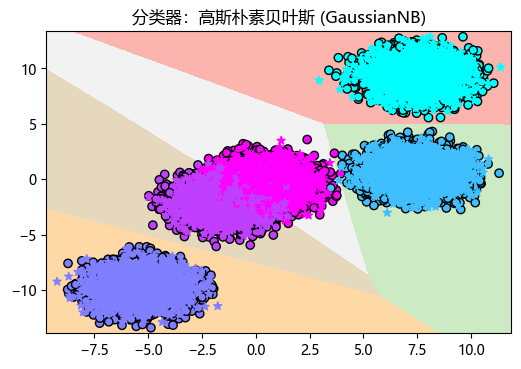

In [42]:
# 导入画图工具
import matplotlib.pyplot as plt
import numpy as np

# 设置坐标轴的范围
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

# 配置参数使 matplotlib绘图工具可以显示中文
# 设置图的分辨率为150像素
plt.figure(dpi = 100)
plt.rcParams['font.sans-serif'] = [u'Microsoft YaHei']

# 用不同背景颜色表示不同的类别
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

z = gnb.predict(np.c_[(xx.ravel(), yy.ravel())]).reshape(xx.shape)
plt.pcolormesh(xx, yy, z, cmap = plt.cm.Pastel1)

# 将训练集和测试集用散点图表示出来
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = plt.cm.cool, edgecolor = "k")
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test, cmap = plt.cm.cool, marker = "*")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# 设置图标题
plt.title("分类器：高斯朴素贝叶斯 (GaussianNB)")
plt.show()


### 2.3 多项式朴素贝叶斯 (Multinomial)

#### **2.3.1 数据预处理**

In [37]:
# 导入多项式贝叶斯
from sklearn.naive_bayes import MultinomialNB
# 使用多项式贝叶斯拟合数据
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
score = mnb.score(X_test, y_test)

print("模型评分：{:.3f}".format(score))

ValueError: Input X must be non-negative

运行结果报错信息如下：

<font style="color:red;font-weight:bold;">ValueError</font>: Input $X$ must be non-negative

意思是，输入的样本特征不能为负值（non-negative）, 这是多项贝叶斯的一种**强制要求**。

下面，我们先使用 MinMaxScaler()函数对输入数据进行归一化，即：将样本 $X$ 的特征约束到[0, 1]之间。

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### **2.3.2 模型评分**
使用预处理后的特征进行模型评分

In [53]:
# 导入多项式贝叶斯
from sklearn.naive_bayes import MultinomialNB
# 使用多项式贝叶斯拟合数据
mnb = MultinomialNB()
mnb.fit(X_train_scaled, y_train)
score = mnb.score(X_test_scaled, y_test)

print("模型评分：{:.3f}".format(score))

模型评分：0.320


#### **2.3.3 可视化分析**

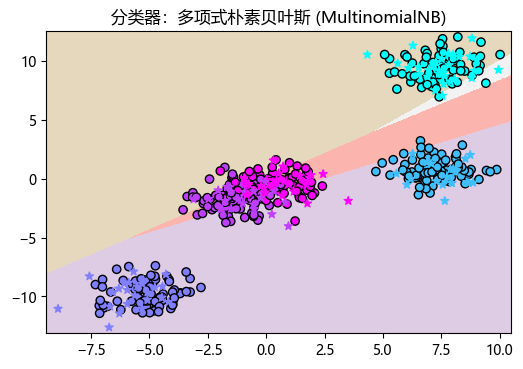

In [54]:
# 导入画图工具
import matplotlib.pyplot as plt
import numpy as np

# 设置坐标轴的范围
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

# 配置参数使 matplotlib绘图工具可以显示中文
# 设置图的分辨率为150像素
plt.figure(dpi = 100)
plt.rcParams['font.sans-serif'] = [u'Microsoft YaHei']

# 用不同背景颜色表示不同的类别
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

z = mnb.predict(np.c_[(xx.ravel(), yy.ravel())]).reshape(xx.shape)
plt.pcolormesh(xx, yy, z, cmap = plt.cm.Pastel1)

# 将训练集和测试集用散点图表示出来
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = plt.cm.cool, edgecolor = "k")
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test, cmap = plt.cm.cool, marker = "*")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# 设置图标题
plt.title("分类器：多项式朴素贝叶斯 (MultinomialNB)")
plt.show()

## 3. 朴素贝叶斯实战——肿瘤判断

### 3.1 数据集分析

威斯康星乳腺肿瘤数据集 (Breast_Cancer)是一个来自于真实世界的数据集，它包含569个病例样本，每个样本具有30个特征。所有样本都被分为两类：恶性（Malignant）和良性（Benign）。

- n = 569
- n_feature = 30 
- y = {0, 1} : {0: 恶性, 1: 良性}

下面，我们先观察一下这个数据集：

In [55]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
# 输出数据当键值
print(cancer.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


从结果来看，该数据集包含以下几个字段（记住，这字段很多数据集通常都全部（或部分）包含）：
- data: 样本的特征，每个样本都包含一个30维的数组构成的特征
- target: 样本的标签，即分类值，取值范围为{0, 1}, 0表示恶性，1表示良性
- target_names: 标签的名字，即 ['malignant', 'benign']
- DESCR: 该数据集的描述
- feature_names: 特征的名称（30维的数组）
- filename: 该数据集的文件名，默认值为："C:\\ProgramData\\Anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\breast_cancer.csv:

尝试使用: <font color=blue> **print(cancer['data'])** </font> 的语法结构来输出数据集的相关信息，例如：输出样本的特征名称 *feature_names* (可尝试输入其他键值)：

In [66]:
print("特征名称：\n{}".format(cancer['feature_names']))

特征名称：
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


### 3.2 建模

- 载入数据集并拆分训练集和测试集

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 38)

- 输出训练集和测试集的数据形状

In [3]:
print("训练集的形态：{}".format(X_train.shape))
print("测试集的形态：{}".format(X_test.shape))


训练集的形态：(426, 30)
测试集的形态：(143, 30)


- 分别使用贝努利贝叶斯、高斯贝叶斯和多项式贝叶斯对训练集进行建模，并使用测试集进行预测

In [4]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB 
from sklearn.naive_bayes import MultinomialNB

# 载入预处理，并对样本进行归一化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


bnb = BernoulliNB()
bnb_norm = BernoulliNB()
gnb = GaussianNB()
gnb_norm = GaussianNB()
mnb = MultinomialNB()

bnb.fit(X_train, y_train)
bnb_norm.fit(X_train_scaled, y_train)
gnb.fit(X_train, y_train)
gnb_norm.fit(X_train_scaled, y_train)
mnb.fit(X_train_scaled, y_train)


score_train_bnb = bnb.score(X_train, y_train)
score_train_gnb = gnb.score(X_train, y_train)
score_train_bnb_norm = bnb_norm.score(X_train_scaled, y_train)
score_train_gnb_norm = gnb_norm.score(X_train_scaled, y_train)
score_train_mnb_norm = mnb.score(X_train_scaled, y_train)
score_test_bnb = bnb_norm.score(X_test, y_test)
score_test_gnb = gnb.score(X_test, y_test)
score_test_bnb_norm = bnb.score(X_test_scaled, y_test)
score_test_gnb_norm = gnb_norm.score(X_test_scaled, y_test)
score_test_mnb_norm = mnb.score(X_test_scaled, y_test)

print("BernoulliNB模型，训练集评分: {0:.3f}, 测试集评分: {1:3f}".format(score_train_bnb, score_test_bnb))
print("BernoulliNB模型(归一化)，训练集评分: {0:.3f}, 测试集评分: {1:3f}".format(score_train_bnb_norm, score_test_bnb_norm))
print("GaussianNB模型，训练集评分: {0:.3f}, 测试集评分: {1:3f}".format(score_train_gnb, score_test_gnb))
print("GaussianNB模型，训练集评分(归一化): {0:.3f}, 测试集评分: {1:3f}".format(score_train_gnb_norm, score_test_gnb_norm))
print("MultinomialNB模型，训练集评分: {0:.3f}, 测试集评分: {1:3f}".format(score_train_mnb_norm, score_test_mnb_norm))

BernoulliNB模型，训练集评分: 0.613, 测试集评分: 0.671329
BernoulliNB模型(归一化)，训练集评分: 0.622, 测试集评分: 0.657343
GaussianNB模型，训练集评分: 0.948, 测试集评分: 0.944056
GaussianNB模型，训练集评分(归一化): 0.946, 测试集评分: 0.937063
MultinomialNB模型，训练集评分: 0.857, 测试集评分: 0.860140


- 给定一个样本，输出预测结果

In [47]:
# 给定某个样本进行预测

data_id = 142

data_x = [X_test[data_id]]
data_y = y_test[data_id]

print("样本的正确分类为: {}".format(data_y))

print("BernoulliNB模型预测的分类是: {}".format(bnb.predict(data_x)[0]))
print("GaussianNB模型预测的分类是: {}".format(gnb.predict(data_x)[0]))
print("MultinomialNB模型预测的分类是: {}".format(mnb.predict(data_x)[0]))


样本的正确分类为: 1
BernoulliNB模型预测的分类是: 1
GaussianNB模型预测的分类是: 1
MultinomialNB模型预测的分类是: 0


<font color="red">可以发现，MultinomialNB在对测试集上的第 **142** 个样本进行预测的时候，失误了！</font>

但此处不是说MultinomialNB就一定比其他算法要差，各位可以尝试预测其他的样本，训练集: [0-416]，测试集: [0:143]

- 输出每个预测分类的概率值

In [54]:
gnb.predict_proba(data_x)

array([[1.62840633e-18, 1.00000000e+00]])

此处，注意predict()函数和predict_proba()函数的区别。

<font style="color:red; font-weight:bold;">【知识点】[predict()函数和predict_proba()函数](functions/predict.ipynb)</font>


### 3.3 学习曲线

学习曲线 (Learning Curve) 是**机器学习**应用中进行<font color=blue>**性能分析**</font>时<font color=red>**极为重要**</font>的参考指标，它可以用来分析各种参数对预测结果的影响，例如: 样本数、学习率等对预测准确率的影响。

下面将给出预测样本数对预测准确率的影响：

*此处只做演示，实现方法将在**第11章**给出*

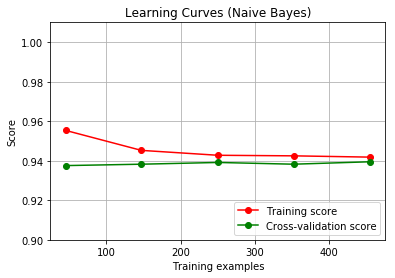

In [111]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.grid()
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="lower right")
    return plt

title = "Learning Curves (Naive Bayes)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.9, 1.01), cv=cv, n_jobs=4)
plt.show()